In [50]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').show();
 } else {
 $('div.input').hide();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [51]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp

from multiprocessing import Pool

In [52]:
def get_folder_list():
    f = next(os.walk('.'))[1]
    return f

# Cluster Analysis in SuSi

There are some important functions in susi for cluster analysis. 

## Radial Distribution function 

<IPython.core.display.Javascript object>


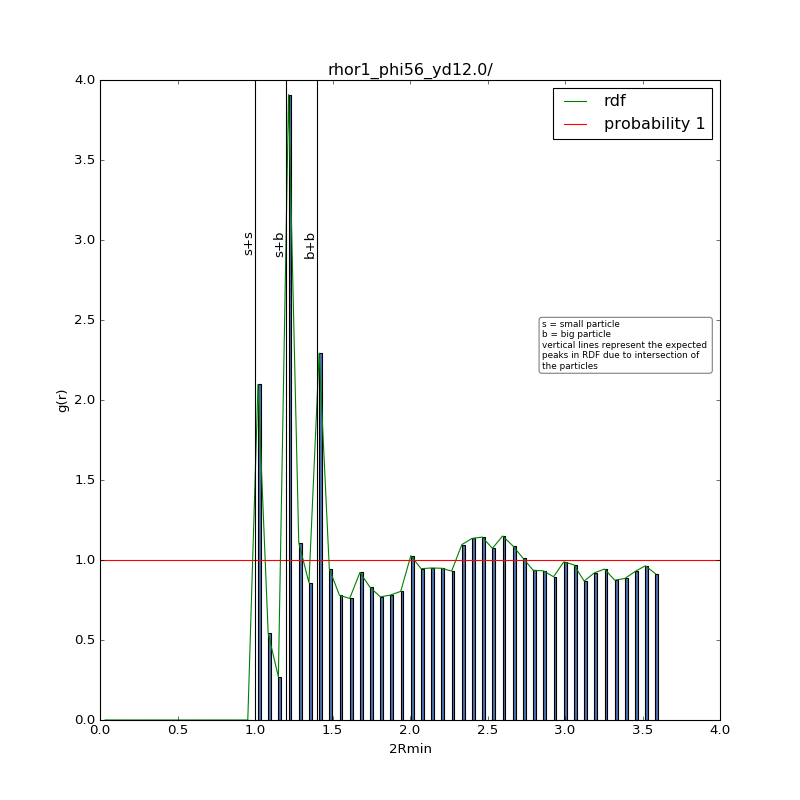

In [53]:
def rdf(phival, shearrate, bins):
    path = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/"
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[-10])

    positions = dataset.particles.r
    fluid_velocity = dataset.fluid.u
    L = dataset.L # Domain size
    LEs = dataset.LEs  # Lees-Edwards shift at time dataset.t
    LEu = dataset.LEu  # Lees-Edwards velocity

    sim_chars = sp.susi.extract_sim_characteristics(dataset)
    sim_chars['histogram'] = {'bins': bins, 'range': (0, 2.8376564979553224e-05)}

    rdf = sp.spatial.radial_distribution_function(positions,**sim_chars)
    plt.figure(figsize=[10,10])
    plt.plot(rdf[0]/(2*np.min(sim_chars['radius'])),rdf[1],"g",label="rdf")
    plt.bar(rdf[0]/np.min(2*np.min(sim_chars['radius'])),rdf[1],width = 1.0/sim_chars['histogram']['bins'])
    plt.axhline(1.0,color="r",label="probability 1")

    # s = sim_chars['radius'].min()
    # b = sim_chars['radius'].max()

    s = 4
    b = 11.2/2
    import inspect, re

    def plot_vline(loc, text):
        plt.axvline(loc/float(2*s),color="k")
        plt.text(loc/float(2*s),3,text, ha = 'right',rotation=90)

    plot_vline(s+s,"s+s")
    plot_vline(s+b,"s+b")
    plot_vline(b+b,"b+b")

    # plot_vline(s+s+s,"s+s+s")
    # plot_vline(s+s+b,"s+s+b")
    # plot_vline(s+b+b,"s+b+b")
    # plot_vline(b+b+b,"b+b+b")

    # plot_vline(s+s+s+s,"s+s+s+s")
    # plot_vline(s+s+s+b,"s+s+s+b")
    # plot_vline(s+s+b+b,"s+s+b+b")
    # plot_vline(s+b+b+b,"s+b+b+b")
    # plot_vline(b+b+b+b,"b+b+b+b")

    plt.legend()
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.text(2.85, 2.5, "s = small particle \nb = big particle \nvertical lines represent the expected \npeaks in RDF due to intersection of \nthe particles"
             , fontsize=8, verticalalignment='top', bbox=props, wrap=True)
    plt.xlabel("2Rmin")
    plt.ylabel("g(r)")
    plt.title(path)
    #plt.savefig("radial_distribution_function")


v = interactive(rdf, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value = 12),\
                bins=(10,100), __manual=False)

display(v)

---------------------------------------

---------------------------------------


In [54]:
# dataset = sp.reader.DataSet(path,particles=True, fluid=True)
# sim_chars = sp.susi.extract_sim_characteristics(dataset)
# sim_chars['histogram'] = {'bins': 100, 'range': (0, 2.8376564979553224e-05)}
# sim_chars['histogramdd']={"bins":(20, 20, 20)}
# pdf = sp.spatial.pair_distribution_function(positions,**sim_chars)



In [55]:
from matplotlib.patches import Circle  # $matplotlib/patches.py

def circle( xy, radius, color="lightsteelblue", facecolor="none", alpha=1, ax=None ):
    """ add a circle to ax= or current axes
    """
        # from .../pylab_examples/ellipse_demo.py
    e = Circle( xy=xy, radius=radius )
    if ax is None:
        ax = plt.gca()  # ax = subplot( 1,1,1 )
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_edgecolor( color )
    e.set_facecolor( facecolor )  # "none" not None
    e.set_alpha( alpha )
    
def plot_pdf(path):
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[-1])
    sim_chars['histogramdd']={"bins":(30,30,30)}
    pdf2d = filter.PairDistributionFunction2D(dataset,**sim_chars)
    X = pdf2d[0]/1e-6
    Y = pdf2d[1]/1e-6
    Z = pdf2d[2]
    plt.figure()
    im = plt.imshow(Z, extent=(X.min(), X.max(), Y.max(), Y.min()),interpolation='bicubic')


    plt.title(path)
    plt.colorbar(im)

# print np.sort(get_folder_list())
# s = 4
# b = 11.2/2
# for path in np.sort(get_folder_list()[:]):
#     try:
#         plot_pdf(path)
#     except Exception as e:
#         print e
#         continue

## Plot the radial distribution function g(r) as a function of distance


<IPython.core.display.Javascript object>


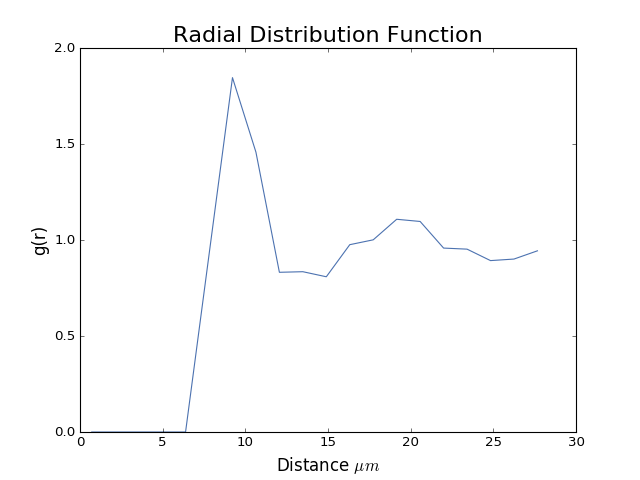

In [56]:
path = 'rhor1_phi56_yd12.0/'
dataset = sp.reader.DataSet(path,particles=True, fluid=True)
dataset.load_state(dataset.tlist[-10])


exp = dataset
plt.figure();
# print exp.keys()
# sim_chars = sp.susi.extract_sim_characteristics(exp)
# sim_chars['histogram'] = {'bins': 1000, 'range': (0, 2.8376564979553224e-05)}
# exp['histogram'] = sim_chars['histogram']
# exp['bin'] = 1000
# print exp['bins']

distance, rdf = exp['radial_distribution_function']
plt.plot(distance * 1e6, rdf);
plt.xlabel('Distance $\mu{m}$',fontsize=15);
plt.ylabel('g(r)', fontsize=15);
plt.title('Radial Distribution Function', fontsize=20);

---------------------------------------


## Lampros standard code for PDF (pair distribution function) at one time step

In [57]:
def lampros_pdf(phival, shearrate, t):
    path = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/"
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[t])
    exp = dataset

    plt.figure();
    distance, pdf = exp['pair_distribution_function']

    XX, ZZ = np.meshgrid(distance[0], distance[2])
    pdf = pdf[:, pdf.shape[1] / 2, :]

    plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pdf)
    plt.colorbar()
    y_mum = 1e6 * distance[1][pdf.shape[1] / 2]

    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at t = '+str(t)+'$y={:.1f} \mu{{m}}$'.format(y_mum), fontsize=20);

v = interactive(lampros_pdf, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value = 12),\
                t=(-1000,-1,1), __manual=True)

display(v)

---------------------------------------


# Lampros code averged over time range

In [58]:
f = FloatProgress(min=0, max=100)
display(f)
L = widgets.Label("")
display(L)
def lampros_pdf(phival, shearrate, trange):
    path = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/"
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[-1])
    exp = dataset
    distance, pdf = exp['pair_distribution_function']
    XX, ZZ = np.meshgrid(distance[0], distance[2])
    pdf = pdf[:, pdf.shape[1] / 2, :]    
    XX_tot, ZZ_tot, pdf_tot = np.zeros_like(XX),np.zeros_like(ZZ), np.zeros_like(pdf)
    n = 0.0
    for i,t in enumerate(range(trange[1],trange[0],-1)):
        n+= 1.0
        f.value = float(i+1)/len(range(trange[1],trange[0],-1))*100
        L.value = "snapshot at t ="+str(dataset.tlist[t])
        dataset.load_state(dataset.tlist[t])
        exp = dataset
 
        distance, pdf = exp['pair_distribution_function']
        XX, ZZ = np.meshgrid(distance[0], distance[2])
        pdf = pdf[:, pdf.shape[1] / 2, :]
        XX_tot += XX
        ZZ_tot += ZZ
        pdf_tot += pdf
    plt.figure();
    XX_tot, ZZ_tot, pdf_tot = XX_tot/n, ZZ_tot/n, pdf_tot/n
    plt.pcolor(XX_tot.T * 1e6, ZZ_tot.T * 1e6, pdf_tot)
    plt.colorbar()
    y_mum = 1e6 * distance[1][pdf_tot.shape[1] / 2]

    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $y={:.1f} \mu{{m}}$'.format(y_mum), fontsize=20);

v = interactive(lampros_pdf, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value = 12),\
                trange=widgets.IntRangeSlider(value=[-10, -1], max=-1, min=-1000.0),__manual=True)
                
display(v)

---------------------------------------


## Eric Code for PDF at one time step

In [66]:
# Eric's code for a PDF with higher resolution
from matplotlib.colors import LogNorm

path = 'rhor1_phi56_yd1.0/'
type = "xy"

def plot_pdf_one_timestep(phi,shearrate,time,bins):
    try:
        time = int(time)
        path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
        dataset = sp.reader.DataSet(path,particles=True, fluid=True)
        dataset.load_state(dataset.tlist[time])
        exp = dataset

        #Create the size of the area that you want to bin the distances in
        limit = 5 * exp.particles.radius.max()
#         print (exp.particles.radius.max())
#         print (limit)
    #     bins = 41
        global edges
        global pair_df
        (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
             L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})
    except:
        print "Unexpected error:", sys.exc_info()[0]
        raise


def plot_plot_pdf_one_timestep(phi,shearrate,time ,xz_vmax,xy_vmax,yz_vmax,bins,analyze_,size,show=True):
    if show:
        plt.ion()
    else:
        plt.ioff()
        
    if analyze_:
        plot_pdf_one_timestep(phi,shearrate,time,bins)

    #Calculate the distances and bin them

    #Plot them in a color mesh
    #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
    #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.

    #Add a value to "edges" by first determining bin stepsize and then appending one step to edges

    max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
    new0=np.append(edges[0],max)
    new1=np.append(edges[1],max)
    new2=np.append(edges[2],max)

    # X-Z PLANE
    #Create the mesh grid, but shift by half a bin to correctly center the image
#     plt.figure(figsize=[17,5])
#     plt.figure(figsize=[3.4*size,1*size])
    plt.figure(figsize=[3*size,3*size])
    plt.subplot(221)
    XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[:, pair_df.shape[1] / 2, :]

    plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax = xz_vmax)#, vmin=0, vmax=10
#     plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,norm=LogNorm(vmin=0.01,vmax = xz_vmax))#, vmin=0, vmax=10
    plt.colorbar()
#         y_mum = 1e6 * edges[1][pair_df.shape[1] / 2]
    y_mum =  1e6 * ( edges[1][1] -edges[1][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$');
    plt.ylabel('$\Delta{z}$ $(\mu{m})$');
    plt.title('PDF at t='+str(time)+'$y={:.2f} \mu{{m}}$ for phi='.format(y_mum)+str(phi)+" yd="+str(shearrate).format(y_mum));
#     print "ymum="+str(y_mum)

#X-Y PLANE

    plt.subplot(222)
    XX, YY = np.meshgrid(new0-7.31208644e-07/2, new1-7.31208644e-07/2)
    pairdf = pair_df[:,:, pair_df.shape[2] / 2]

    plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf,vmin=0,vmax = xy_vmax)
    plt.colorbar()
    z_mum = 1e6 * ( edges[2][1] -edges[2][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$');
    plt.ylabel('$\Delta{y}$ $(\mu{m})$');
#         plt.title('PDF at t='+str(time)+'$z={:.2f} \mu{{m}}$'.format(z_mum));
    plt.title('PDF at t='+str(time)+'$z={:.2f} \mu{{m}}$ for phi='.format(z_mum)+str(phi)+" yd="+str(shearrate).format(z_mum));
#Y-Z PLANE

    plt.subplot(223)
    YY, ZZ = np.meshgrid(new1-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[pair_df.shape[0] / 2,:,:]

    plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax = yz_vmax)
    plt.colorbar()
#         x_mum = 1e6 * edges[0][pair_df.shape[0] / 2]
    x_mum = 1e6 * ( edges[0][1] -edges[0][0] )  
    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{y}$ $(\mu{m})$');
    plt.ylabel('$\Delta{z}$ $(\mu{m})$');
    plt.tight_layout()
#         plt.title('PDF at t='+str(time)+'$x={:.2f} \mu{{m}}$'.format(x_mum));
    plt.title('PDF at t='+str(time)+'$x={:.2f} \mu{{m}}$ for phi='.format(x_mum)+str(phi)+" yd="+str(shearrate).format(x_mum));
    
    plt.subplot(224)
    nufilepath = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))+"/result/nu_t.dat"
    db = pd.read_csv(nufilepath)
    plt.plot(db[db.columns[2]])
    plt.axvline(time)
    plt.xlabel("timestep")
    plt.ylabel("Viscosity Pa.s")
    plt.yscale("log")
    
    name = "plots/cluster_analysis_phi"+str(phi)+"_yd"+str(shearrate).replace('.','_')+"_t"+str(int(time))
#     print name 
    plt.savefig(name)


v = interactive(plot_plot_pdf_one_timestep, \
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12),\
                #time = widgets.IntSlider(min= -1000, max= -1,value = -1, step = -1,orientation = "vertical"),\
                #time = widgets.IntSlider(max= 1000, min= 1,value = 1, step = 1,orientation = "vertical"),\
                time = widgets.FloatText(value=1),\
                bins = widgets.IntSlider(min = 11,max = 101,value = 31, step = 1,orientation = "vertical"),\
                size = widgets.FloatSlider(min = 1,max = 10,value = 3.75, step = 0.25,orientation = "vertical"),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.widget_bool.Checkbox(value=True,description= "Analyze?"),\
                __manual=True)
display(widgets.VBox(v.children[:2]))
display(widgets.HBox(v.children[2:-1]))
display(widgets.HBox(v.children[-1:]))
display(widgets.Label(value = "Run analyze every time you change the dataset. No need to analyze when changing plot charecteristics"))

## plot pdf of a range of snaphots and animate 

In [61]:
progress = widgets.IntProgress(value=0)
def plot_time_frames(phi,shearrate,tmin, tmax ,xz_vmax,xy_vmax,yz_vmax,bins,analyze_,size,show):
    for plot_time_frames_progress,time in enumerate(range(tmin, tmax)):
        progress.value = float(plot_time_frames_progress)/len(range(tmin, tmax))*100
        plot_plot_pdf_one_timestep(phi,shearrate,time,xz_vmax,xy_vmax,yz_vmax,bins,analyze_,size,show)
        

v_plot_time_frames = interactive(plot_time_frames, \
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12.5),\
                #time = widgets.IntSlider(min= -1000, max= -1,value = -1, step = -1,orientation = "vertical"),\
                #time = widgets.IntSlider(max= 1000, min= 1,value = 1, step = 1,orientation = "vertical"),\
                tmin = widgets.widget_int.BoundedIntText(value=730,min=1,max=10000),\
                tmax = widgets.widget_int.BoundedIntText(value=735, min=1,max=10000),\
                bins = widgets.IntSlider(min = 11,max = 101,value = 31, step = 1,orientation = "vertical"),\
                size = widgets.FloatSlider(min = 1,max = 10,value = 3.75, step = 0.25,orientation = "vertical"),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.widget_bool.Checkbox(value=True,description= "Analyze?"),\
                show=widgets.Checkbox(value=False),\
                __manual=True)
display(widgets.VBox(v_plot_time_frames.children[:2]))
display(widgets.HBox(v_plot_time_frames.children[4:-1]))
display(widgets.HBox(v_plot_time_frames.children[2:4]))
display(widgets.HBox(v_plot_time_frames.children[-1:]))
display(progress)
display(widgets.Label(value = "Run analyze every time you change the dataset. \
                            No need to analyze when changing plot charecteristics"))
play = widgets.Play(disabled=False)
slider = widgets.IntSlider(min=v_plot_time_frames.children[2].value, max = v_plot_time_frames.children[3].value)
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.jslink((slider, 'min'), (play, 'min'))
widgets.jslink((slider, 'max'), (play, 'max'))
display(widgets.HBox([play, slider]))

link3 = widgets.jslink((v_plot_time_frames.children[3], 'value'), (v_plot_time_frames.children[2], 'max'))
link4 = widgets.jslink((v_plot_time_frames.children[2], 'value'), (v_plot_time_frames.children[3], 'min'))
link1 = widgets.jslink((v_plot_time_frames.children[2], 'value'), (slider, 'min'))
link2 = widgets.jslink((v_plot_time_frames.children[3], 'value'), (slider, 'max'))


philabel = widgets.Label(value = "")
ydlabel = widgets.Label(value = "")
tminlabel = widgets.Label(value = "")
tmaxlabel = widgets.Label(value = "")
tlabel = widgets.Label(value = "")

# link5 = widgets.jslink((v.children[0], 'value'), (philabel, 'value'))
# link6 = widgets.jslink((v.children[1], 'value'), (ydlabel, 'value'))
# link7 = widgets.jslink((v.children[2], 'value'), (tminlabel, 'value'))
# link8 = widgets.jslink((v.children[3], 'value'), (tmaxlabel, 'value'))
# link9 = widgets.jslink((slider, 'value'), (tlabel, 'value'))
# display(philabel,ydlabel,tminlabel,tmaxlabel,tlabel)



filename = widgets.Label(value="")
def handle_data_change(change):
    filename.value =  "plots/cluster_analysis_phi"+str(v_plot_time_frames.children[0].value)+"_yd"+\
                    str(v_plot_time_frames.children[1].value).replace('.','_')+"_t"+str(slider.value)+".png"
for i in v_plot_time_frames.children:
    i.observe(handle_data_change, names='value')
    
slider.observe(handle_data_change,names='value')
display(filename)

from IPython.display import Image
# def handle_image_change(change):
#     if os.path.exists(filename.value):
#         pdf_figure = Image(filename.value)
# display(pdf_figure)
# slider.observe(handle_image_change,'value')

image = widgets.Image(value = "",width=800, height=800)
imagesize = widgets.IntText(value =400, description="image size")
widgets.jslink((imagesize,'value'),(image,'width'))
widgets.jslink((imagesize,'value'),(image,'height'))
display(imagesize)
display(image)
def handle_image_change(change):
    if os.path.exists(filename.value):
        image.value = open(filename.value).read()
        
slider.observe(handle_image_change,'value')

---------------------------------------


# Eric Code for average PDF over time

## TimeSeries Information Between snapshots

<IPython.core.display.Javascript object>


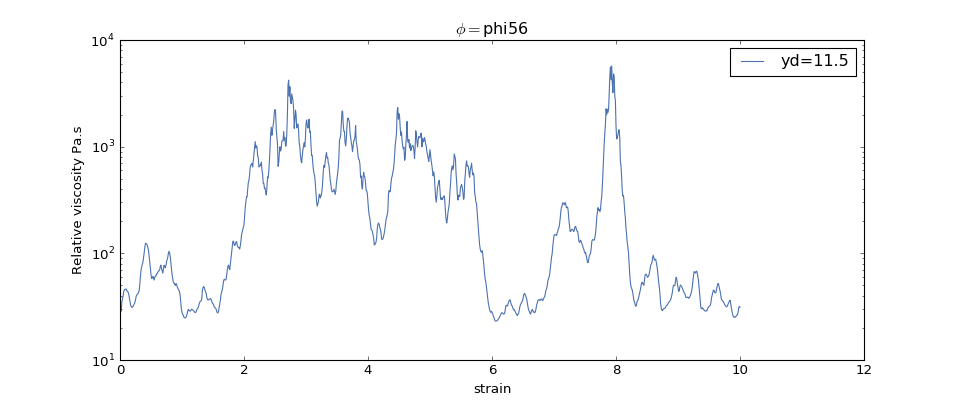

Total timesteps :999
Available timesteps :899


In [62]:

def plot_timeseries(phival,ydvals,vrange):
    plt.style.use('seaborn-deep')
    l = []
    phival = "phi"+str(phival)
    for f in get_folder_list():
        try:
            if f.split("_")[1] == phival:
                l.append(f)
        except:
            continue
    nufiles = [f+"/result/nu_t.dat" for f in l]
    plt.figure(figsize=[12,5])
    minshear = 100000
    for f in np.sort(nufiles):
        try:
            db = pd.read_csv(f)
            nu = db[db.columns[2]]
            nu_rel = db[db.columns[4]]
            t = db[db.columns[1]]
            shearrate = float(f.split("_")[2].split("/")[0].split("yd")[1])
            if shearrate in ydvals: 
                shear = t*shearrate
                if minshear > shear.max(): minshear = shear.max()
                plt.plot(shear[vrange[0]: vrange[1]],nu_rel[vrange[0]: vrange[1]],label="yd="+str(shearrate))
#                 print vrange[0]
#                 plt.plot(shear,nu_rel,label="yd="+str(shearrate))
                print "Total timesteps :"+str(len(shear))
                print "Available timesteps :"+str(int(len(shear) - len(shear)/float(shear.max())))
        except:
            continue
    plt.legend(loc="best")
    plt.title("$\phi=$"+str(phival))
    plt.yscale("log")
    plt.xlabel("strain")
    plt.ylabel("Relative viscosity Pa.s")

#     plt.xlim([0,minshear])
    name = "comparison_viscosity_" + str(phival)+ '_'.join([str(i) for i in ydvals])
#     plt.savefig(name)

time_series = interactive(plot_timeseries, \
                vrange = widgets.IntRangeSlider(min = 0, max = 1500,value = [0,1000]),\
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                ydvals= widgets.SelectMultiple(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value=[12.0]),\
                __manual=False)

display(time_series)

## plot time averaged PDF

<IPython.core.display.Javascript object>


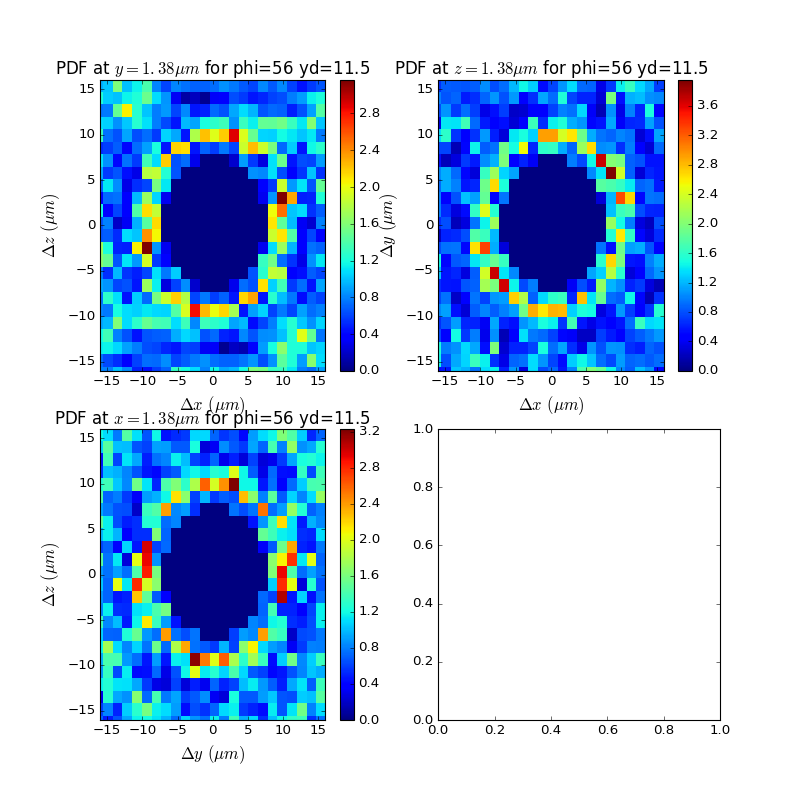

ymum=1.3750556443


NameError: global name 'db' is not defined

In [74]:
# Eric's code for a PDF with higher resolution
f = FloatProgress(min=0, max=100)
display(f)
L = widgets.Label("")
display(L)
def _plot_pdf_timerange(phi,time ,shearrate,bins = 41):
    
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    tmin, tmax = time[0], time[1] 
    step = 1.0
    global edges
    global pair_df
    for t in range(tmin,tmax,1):
        dataset.load_state(dataset.tlist[t])
        exp = dataset
        #Create the size of the area that you want to bin the distances in
        limit = 5 * exp.particles.radius.max()
        #Calculate the distances and bin them
        (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
             L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})
        if step == 1: edges_tot, pair_df_tot = np.zeros_like(edges), np.zeros_like(pair_df)
        edges_tot += edges
        pair_df_tot += pair_df
        step += 1.0
        f.value = step/int(tmax-tmin+1)*100
        L.value = str(int(step/int(tmax-tmin+1)*100))+"% completed"

    edges = edges_tot/step
    pair_df = pair_df_tot/step


def plot_pdf_timerange(phi,time ,shearrate,bins, xz_vmax,xy_vmax,yz_vmax,analyze_):
    if analyze_:
        _plot_pdf_timerange(phi,time ,shearrate,bins)
    #Plot them in a color mesh
    #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
    #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.

    #Add a value to "edges" by first determining bin stepsize and then appending one step to edges
    max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
    new0=np.append(edges[0],max)
    new1=np.append(edges[1],max)
    new2=np.append(edges[2],max)

    # X-Z PLANE
    #Create the mesh grid, but shift by half a bin to correctly center the image
    plt.figure(figsize=[10,10])

    plt.subplot(221)
    XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[:, pair_df.shape[1] / 2, :]

    plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
#         y_mum = 1e6 * edges[1][pair_df.shape[1] / 2]
    y_mum =  1e6 * ( edges[1][1] -edges[1][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $y={:.2f} \mu{{m}}$ for phi='.format(y_mum)+str(phi)+" yd="+str(shearrate).format(y_mum), fontsize=15);
    print "ymum="+str(y_mum)

    #X-Y PLANE
    plt.subplot(222)
    XX, YY = np.meshgrid(new0-7.31208644e-07/2, new1-7.31208644e-07/2)
    pairdf = pair_df[:,:, pair_df.shape[2] / 2]

    plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf)
    plt.colorbar()
    z_mum = 1e6 * ( edges[2][1] -edges[2][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $z={:.2f} \mu{{m}}$ for phi='.format(z_mum)+str(phi)+" yd="+str(shearrate).format(z_mum), fontsize=15);

    #Y-Z PLANE
    plt.subplot(223)
    YY, ZZ = np.meshgrid(new1-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[pair_df.shape[0] / 2,:,:]

    plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
    x_mum = 1e6 *( edges[0][1] -edges[0][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $x={:.2f} \mu{{m}}$ for phi='.format(x_mum)+str(phi)+" yd="+str(shearrate).format(x_mum), fontsize=15);
    
    plt.subplot(224)
    nupath = path + "/result/nu_t.dat"
    df = pd.read_csv(nupath)
    nu = db[db.columns[2]]
    nu_rel = db[db.columns[4]]
    t = db[db.columns[1]]
    shearrate = float(f.split("_")[2].split("/")[0].split("yd")[1])
    shear = t*shearrate
    plt.plot(shear, nu)
    
    plt.savefig("pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_trange"+str(tmin)+"_"+str(tmax))
        



v = interactive(plot_pdf_timerange, \
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "horizontal",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "horizontal",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "horizontal",description = "yz colorbax max"),\
                analyze_ = widgets.ToggleButtons(options=[True,False],value = True,description= "Analyze?"),\
                
                time = widgets.IntRangeSlider(min= 0, max= 1500,value = [0,1000], step = 1),\
                bins = widgets.IntSlider(options = [11,101],value = 41, step = 2),__manual=True)
display(v)

